In [1]:
from games.rps import RPS
from agents.regretmatching import RegretMatching
from agents.fictitiousplay import FictitiousPlay
from agents.random_agent import RandomAgent
from agents.human_agent import HumanAgent
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

In [2]:
g = RPS()

In [3]:
g.reset()

({'agent_0': None, 'agent_1': None}, None)

# Agent vs Agent

In [4]:
def play_rps_game(agents, num_games = 1000):
    # count wins, losses, and ties
    agent_results = {agent: {'wins': 0, 'losses': 0, 'ties': 0} for agent in agents.keys()}
    for i in tqdm(range(num_games)):
        actions = dict(map(lambda agent: (agent, agents[agent].action()), g.agents))
        _, rewards, _, _, _ = g.step(actions)
        for agent in g.agents:
            if rewards[agent] > 0:
                agent_results[agent]['wins'] += 1
            elif rewards[agent] < 0:
                agent_results[agent]['losses'] += 1
            else:
                agent_results[agent]['ties'] += 1

    learned_strategies = dict(map(lambda agent: (agent, agents[agent].policy()), g.agents))
    return learned_strategies, agent_results

In [5]:
all_agents = {
    'RegretMatching': lambda env, agent_name: RegretMatching(env, agent_name),
    'RandomAgent': lambda env, agent_name: RandomAgent(env, agent_name),
    'FictitiousPlay': lambda env, agent_name: FictitiousPlay(env, agent_name),
    'RandomAgent_Bias': lambda env, agent_name: RandomAgent(env, agent_name, initial=[0.2, 0.2, 0.6]),
}

In [6]:
def plot_learned_strategies(learned_strategies, agent1_name, agent2_name, agent1_id, agent2_id):
    labels = ['Rock', 'Paper', 'Scissors']
    agent1_strategies = learned_strategies[agent1_id]
    agent2_strategies = learned_strategies[agent2_id]

    x = range(len(labels))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(x, agent1_strategies, color='b', align='center')
    plt.xlabel('Actions')
    plt.ylabel('Probability')
    plt.title(f'{agent1_name} Learned Strategies')
    plt.xticks(x, labels)

    plt.subplot(1, 2, 2)
    plt.bar(x, agent2_strategies, color='r', align='center')
    plt.xlabel('Actions')
    plt.ylabel('Probability')
    plt.title(f'{agent2_name} Learned Strategies')
    plt.xticks(x, labels)

    plt.tight_layout()
    plt.show()


In [7]:
def plot_agent_results(agent_results, agent1_name, agent2_name, agent1_id, agent2_id):
    labels = ['wins', 'losses', 'ties']
    agent1_results = [agent_results[(agent1_name, agent2_name)]['agent_results'][agent1_id][label] for label in labels]
    agent2_results = [agent_results[(agent1_name, agent2_name)]['agent_results'][agent2_id][label] for label in labels]

    x = range(len(labels))

    plt.bar(x, agent1_results, width=0.4, label=agent1_name, color='b', align='center')
    plt.bar(x, agent2_results, width=0.4, label=agent2_name, color='r', align='edge')

    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.title(f'{agent1_name} vs {agent2_name}')
    plt.xticks(x, labels, rotation='vertical')
    plt.legend()
    plt.show()

Running experiment with RegretMatching vs RegretMatching


100%|██████████| 10000/10000 [00:02<00:00, 3527.98it/s]


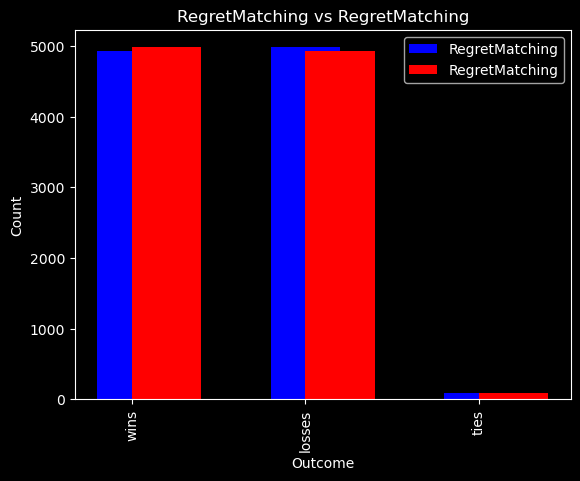

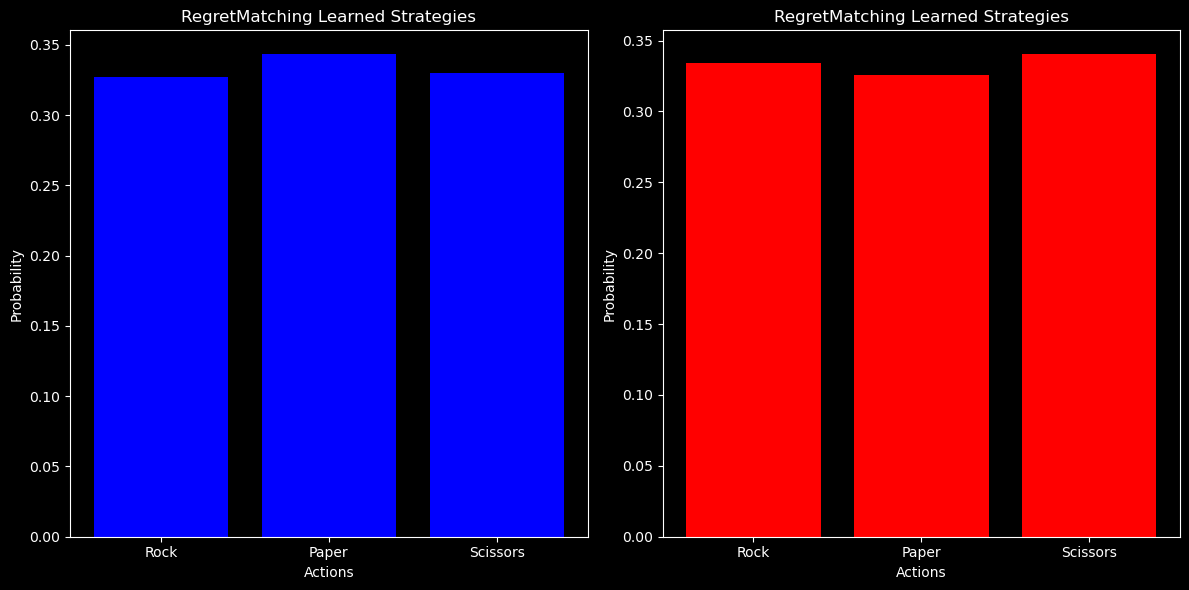

Running experiment with RegretMatching vs RandomAgent


100%|██████████| 10000/10000 [00:01<00:00, 5963.62it/s]


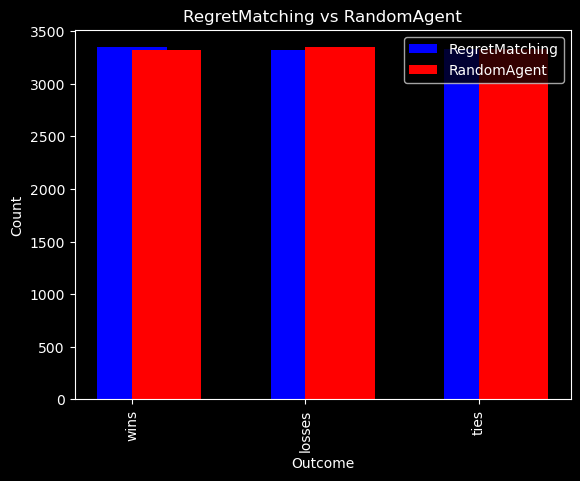

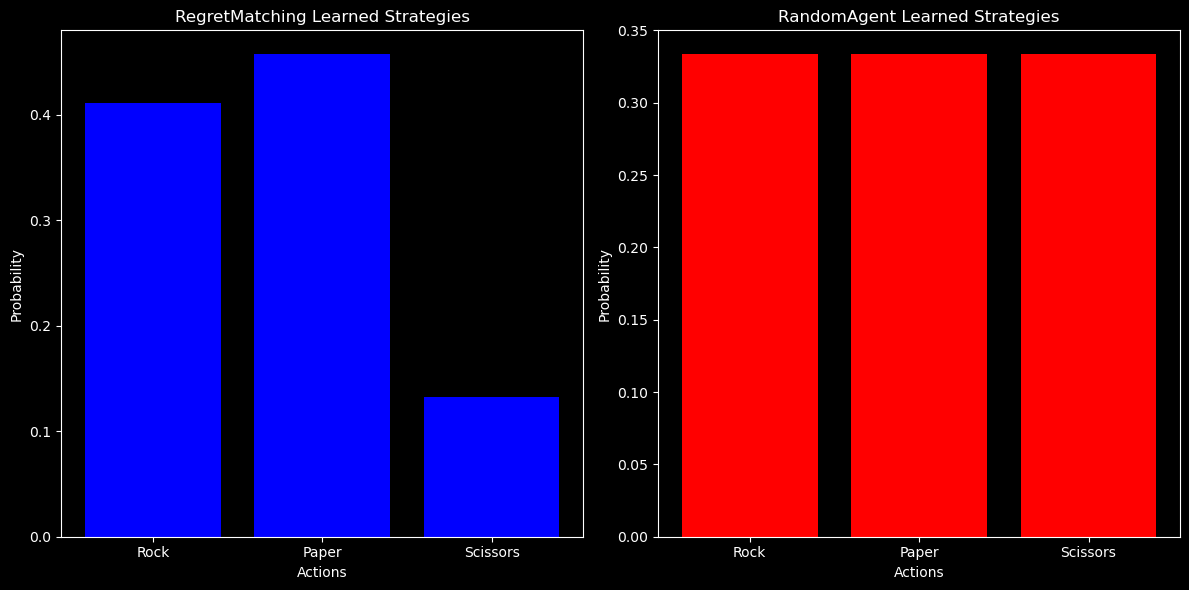

Running experiment with RegretMatching vs FictitiousPlay


100%|██████████| 10000/10000 [00:05<00:00, 1713.05it/s]


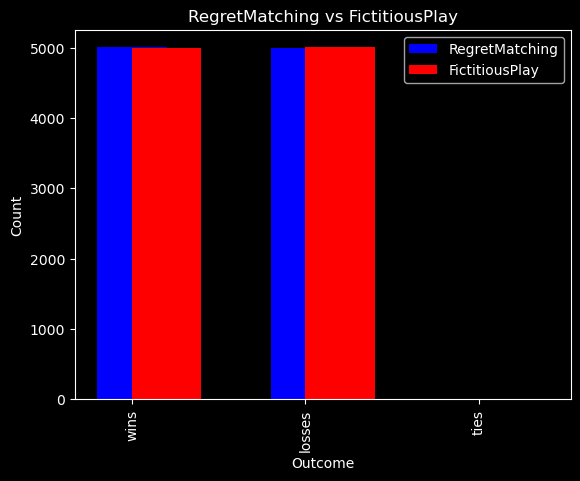

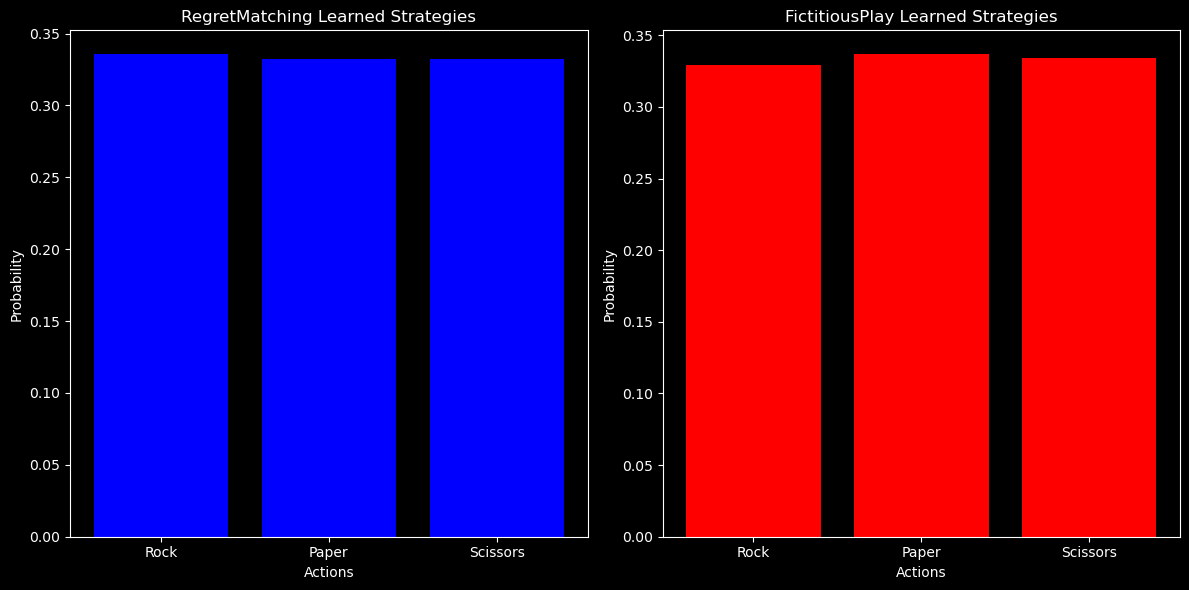

Running experiment with RegretMatching vs RandomAgent_Bias


100%|██████████| 10000/10000 [00:01<00:00, 6237.79it/s]


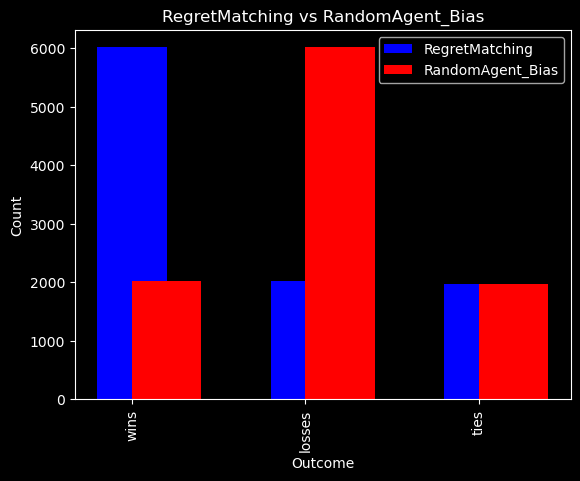

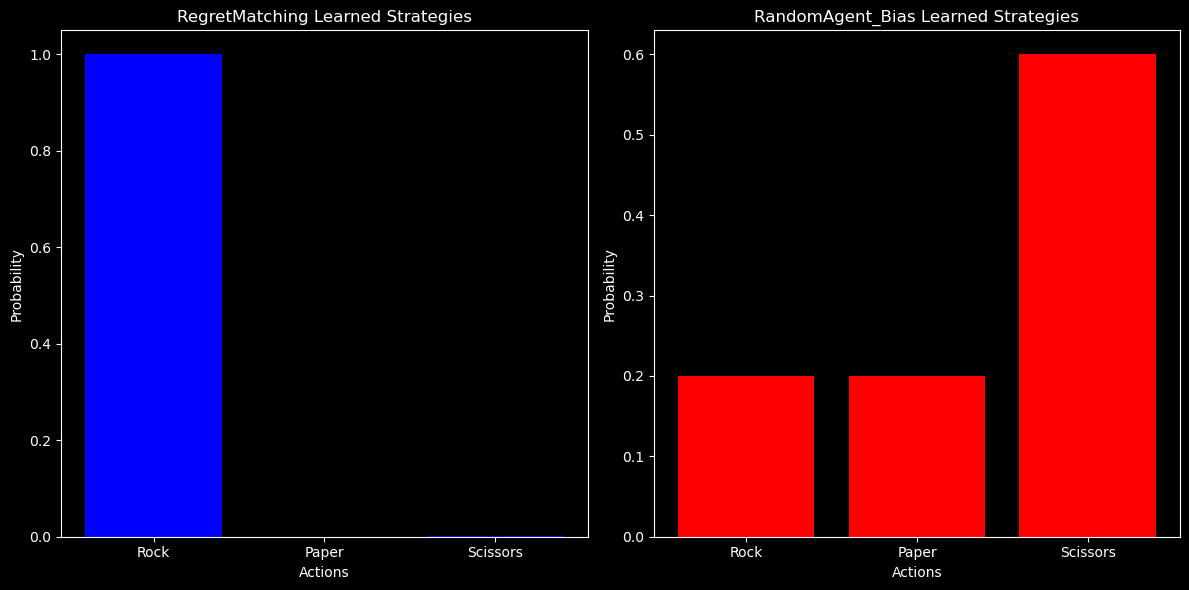

Running experiment with RandomAgent vs RegretMatching


100%|██████████| 10000/10000 [00:01<00:00, 6201.25it/s]


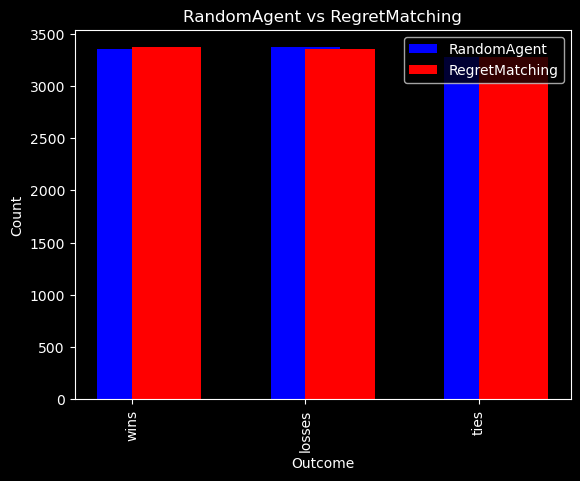

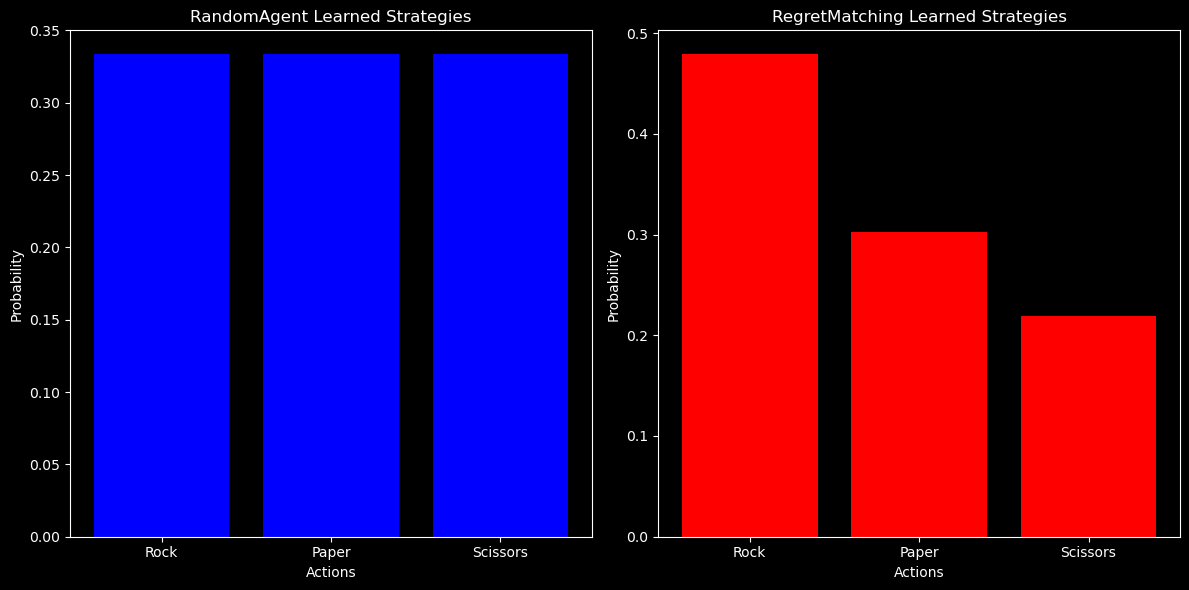

Running experiment with RandomAgent vs RandomAgent


100%|██████████| 10000/10000 [00:00<00:00, 46557.23it/s]


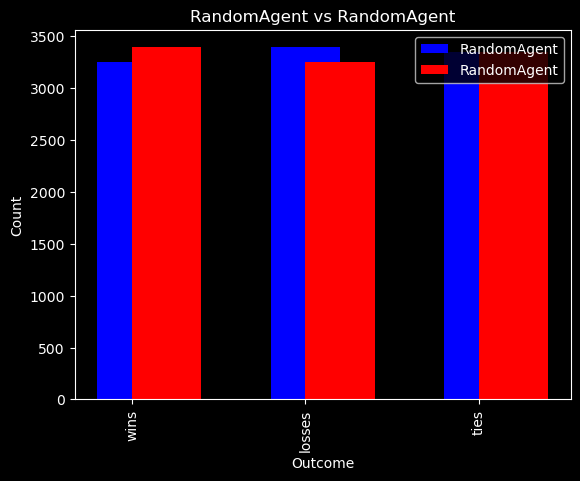

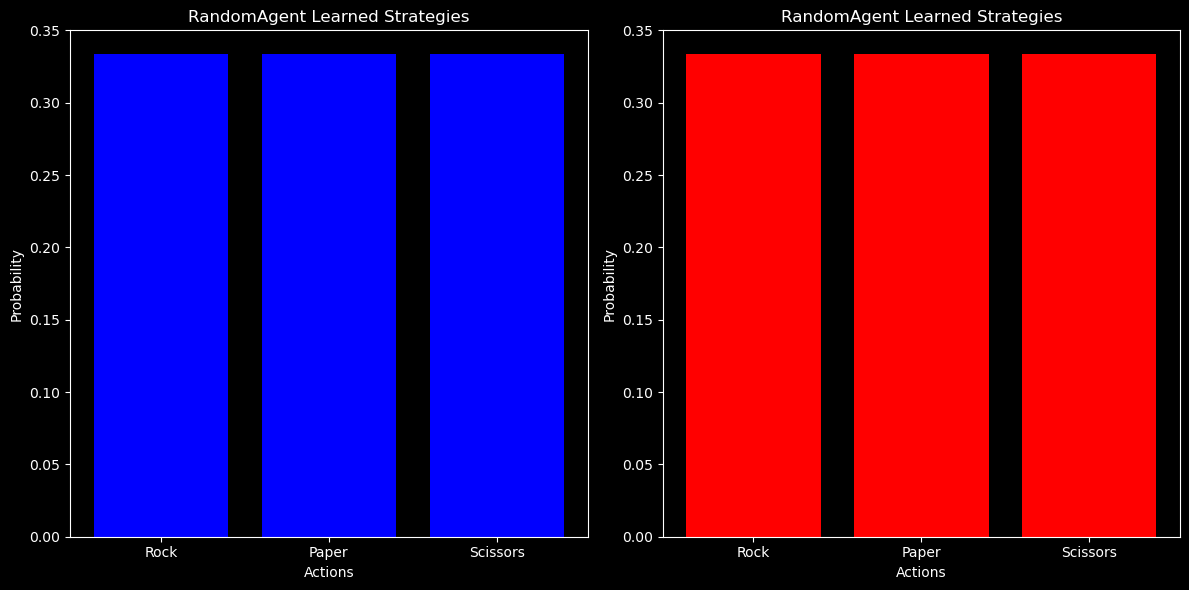

Running experiment with RandomAgent vs FictitiousPlay


100%|██████████| 10000/10000 [00:04<00:00, 2173.42it/s]


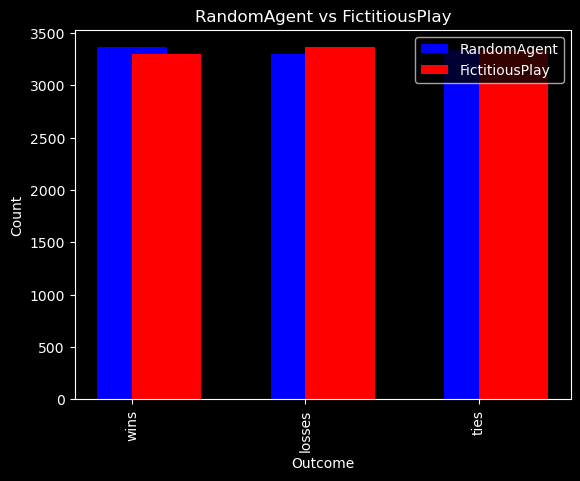

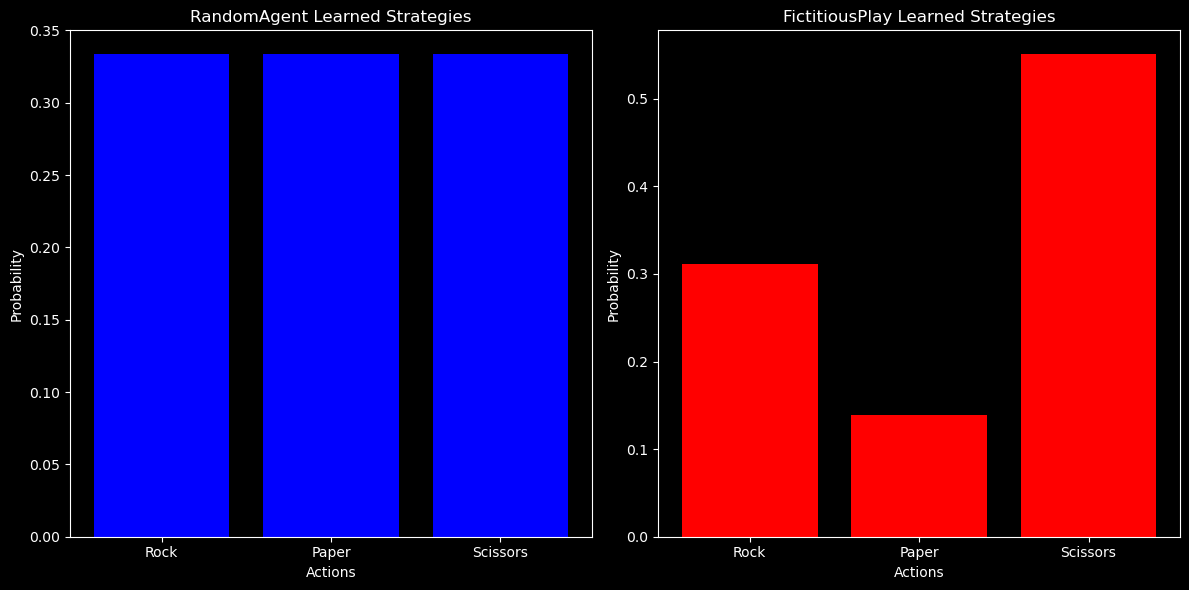

Running experiment with RandomAgent vs RandomAgent_Bias


100%|██████████| 10000/10000 [00:00<00:00, 49339.01it/s]


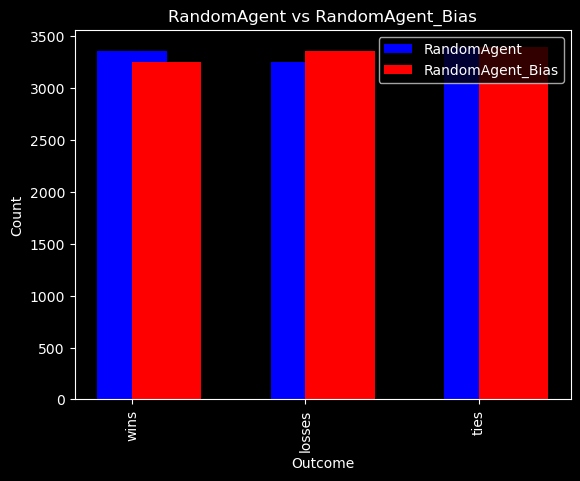

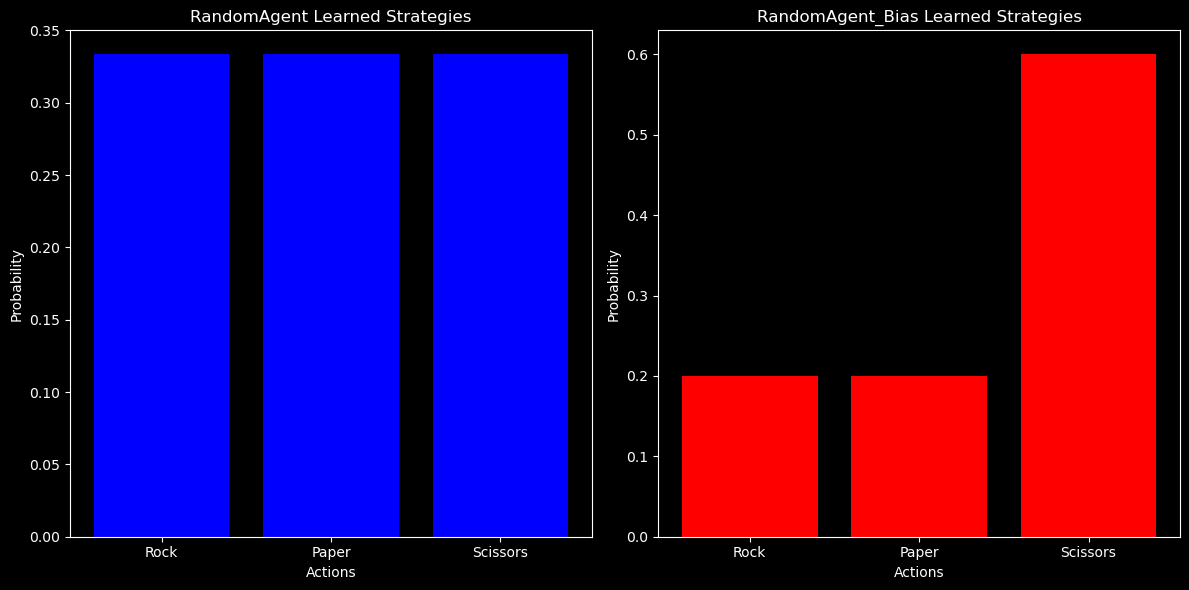

Running experiment with FictitiousPlay vs RegretMatching


100%|██████████| 10000/10000 [00:05<00:00, 1737.64it/s]


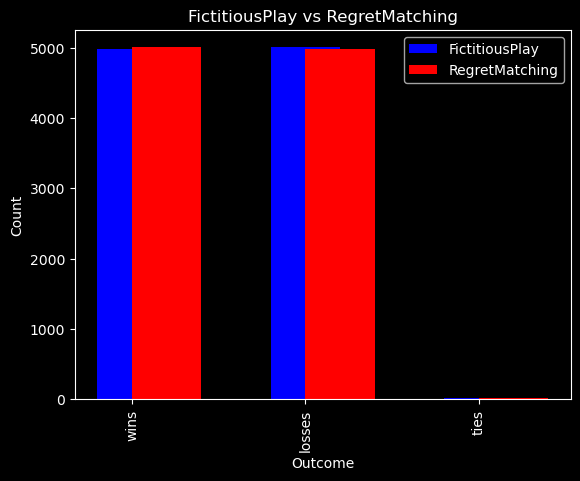

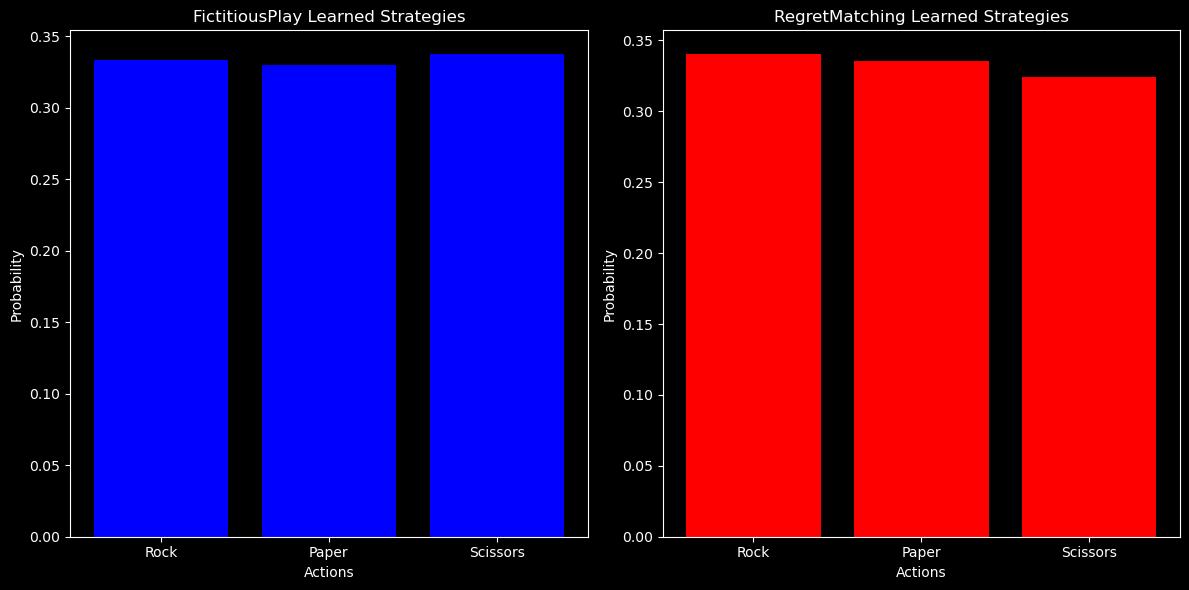

Running experiment with FictitiousPlay vs RandomAgent


100%|██████████| 10000/10000 [00:04<00:00, 2214.75it/s]


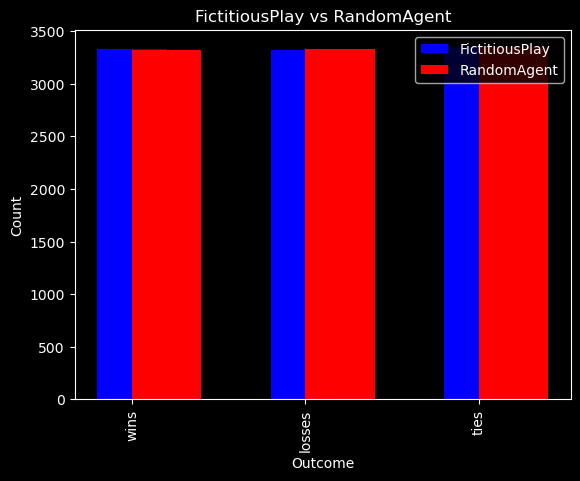

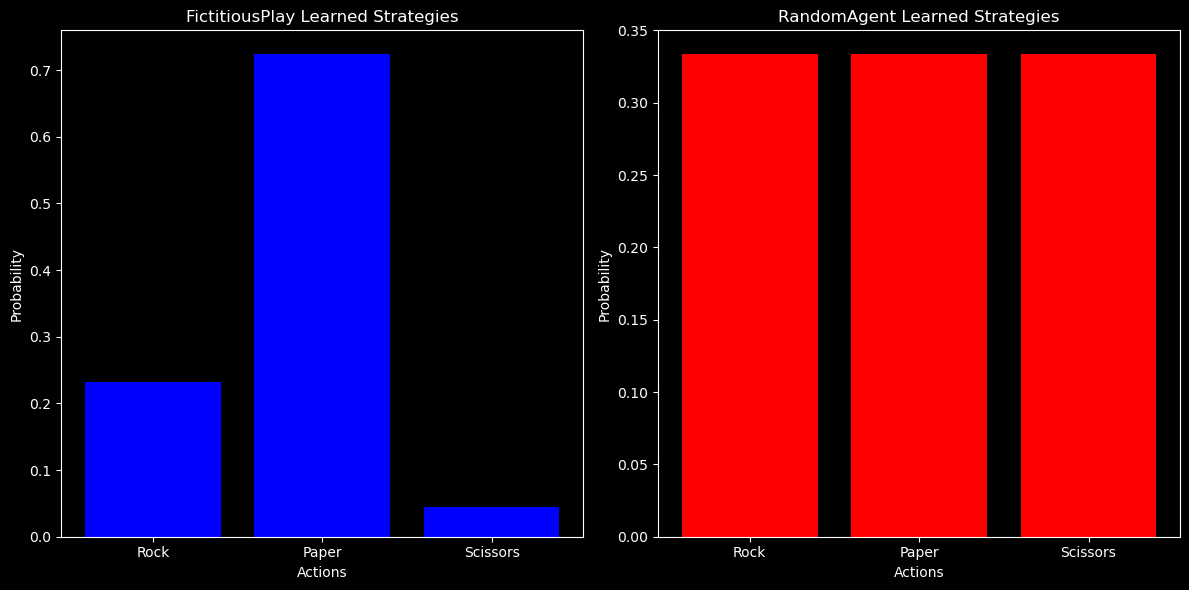

Running experiment with FictitiousPlay vs FictitiousPlay


100%|██████████| 10000/10000 [00:08<00:00, 1173.22it/s]


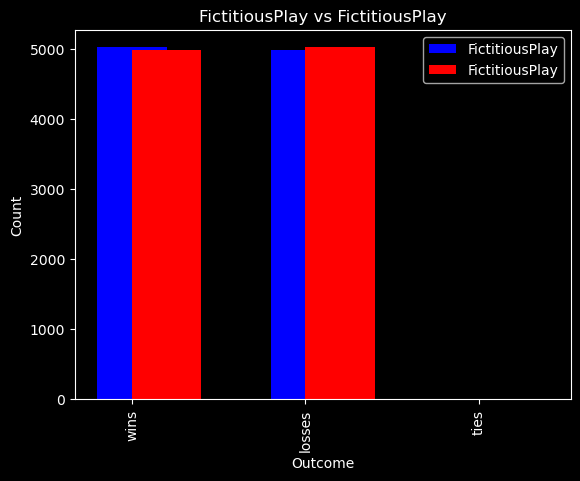

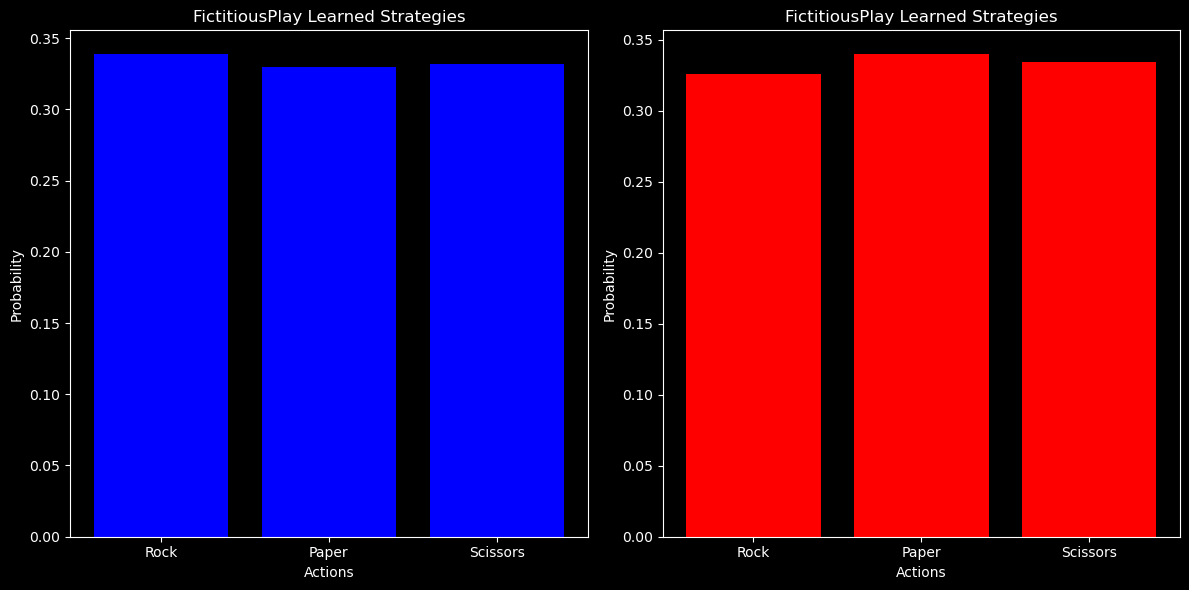

Running experiment with FictitiousPlay vs RandomAgent_Bias


100%|██████████| 10000/10000 [00:04<00:00, 2182.04it/s]


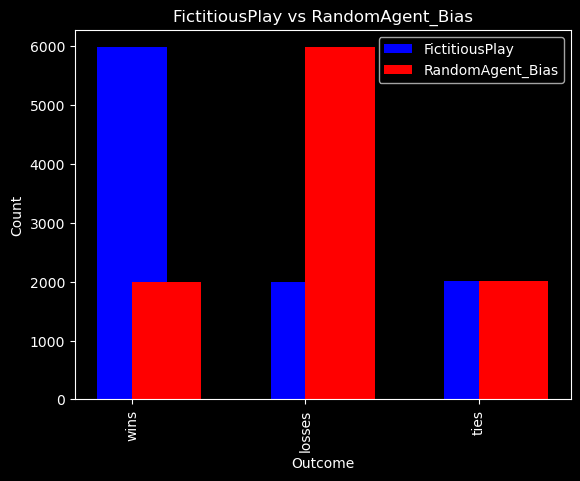

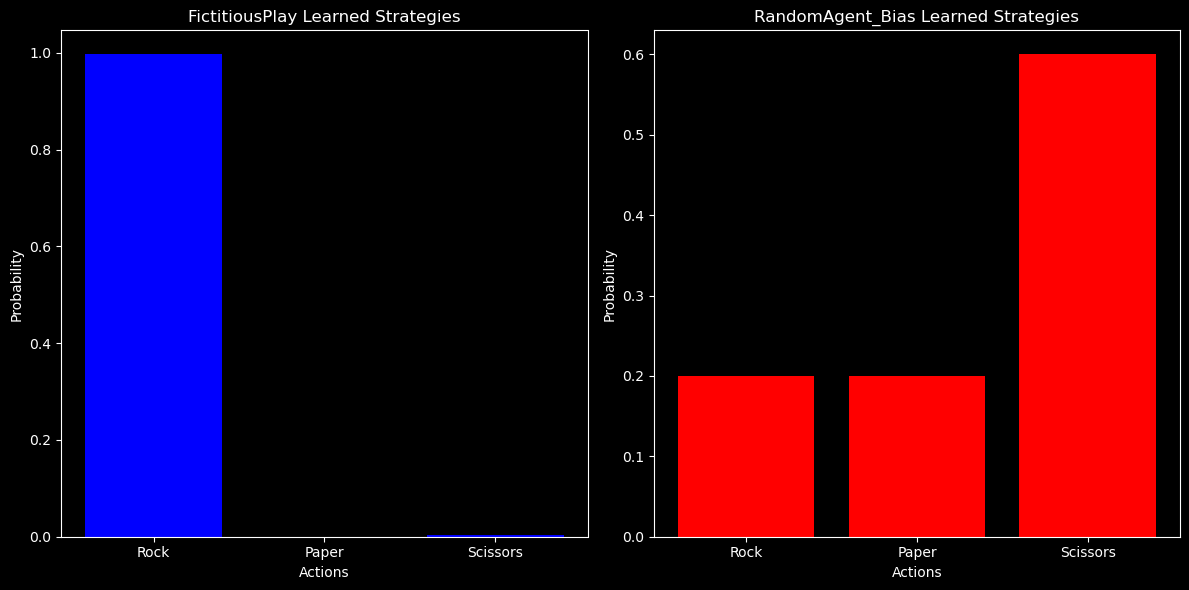

Running experiment with RandomAgent_Bias vs RegretMatching


100%|██████████| 10000/10000 [00:01<00:00, 6229.44it/s]


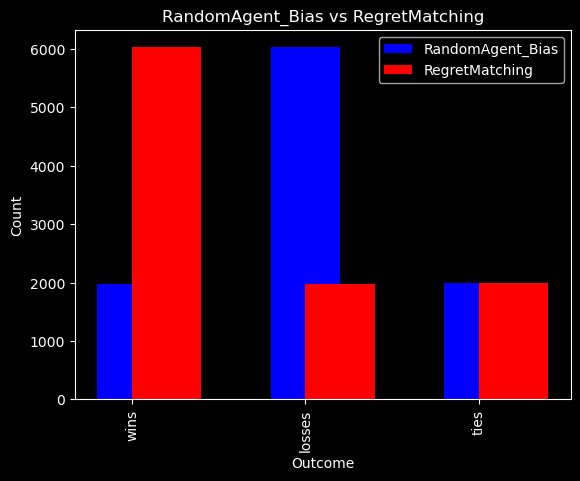

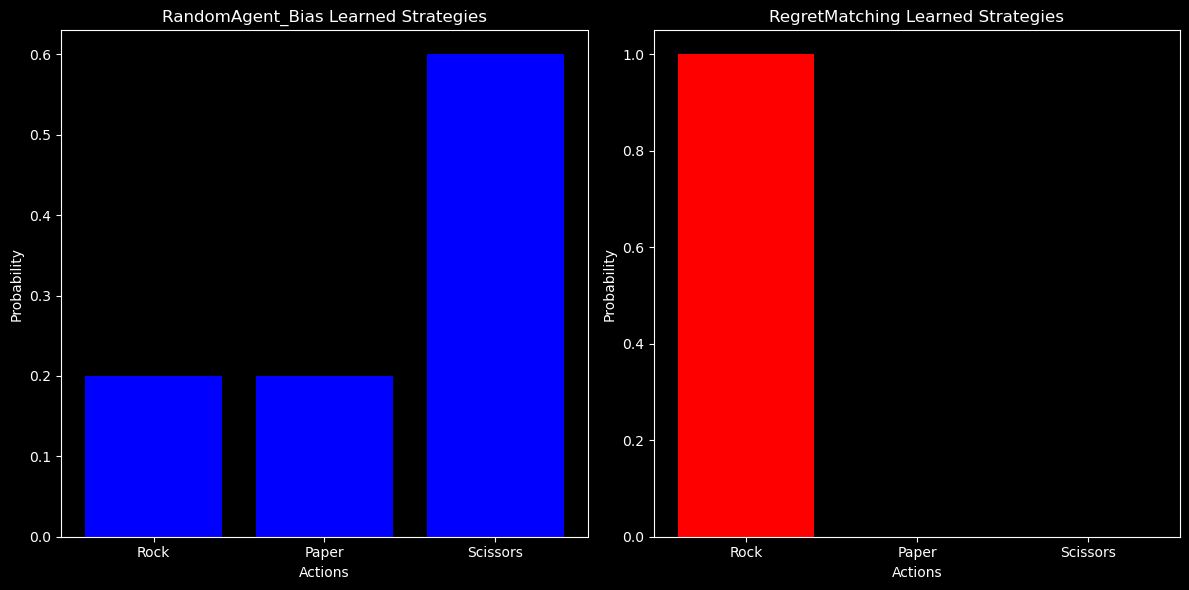

Running experiment with RandomAgent_Bias vs RandomAgent


100%|██████████| 10000/10000 [00:00<00:00, 49165.16it/s]


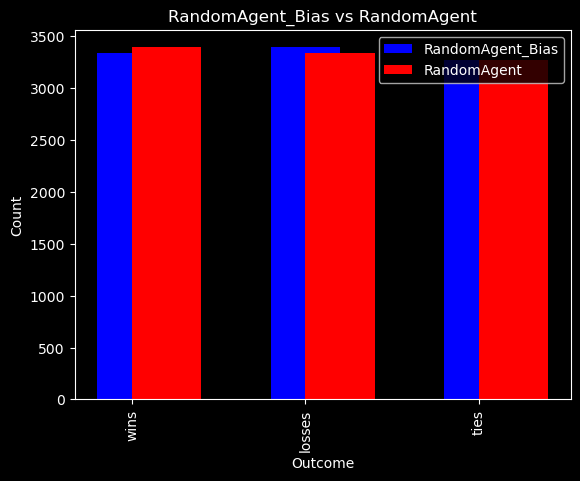

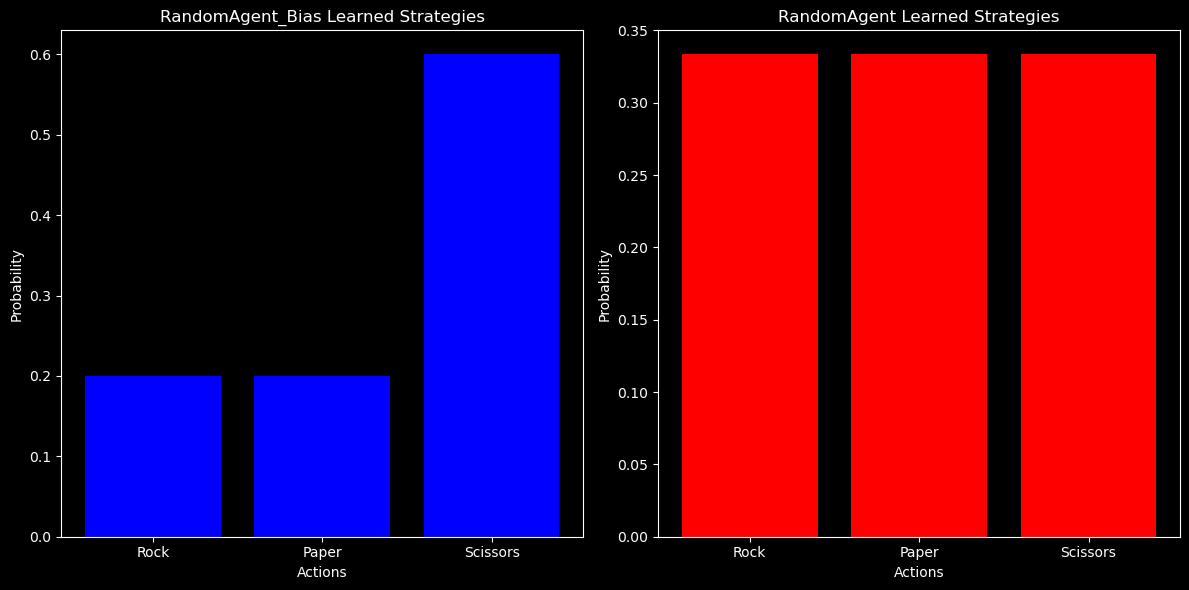

Running experiment with RandomAgent_Bias vs FictitiousPlay


100%|██████████| 10000/10000 [00:04<00:00, 2146.53it/s]


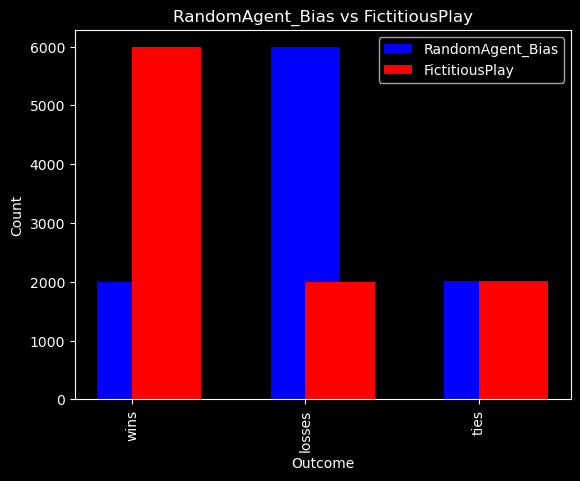

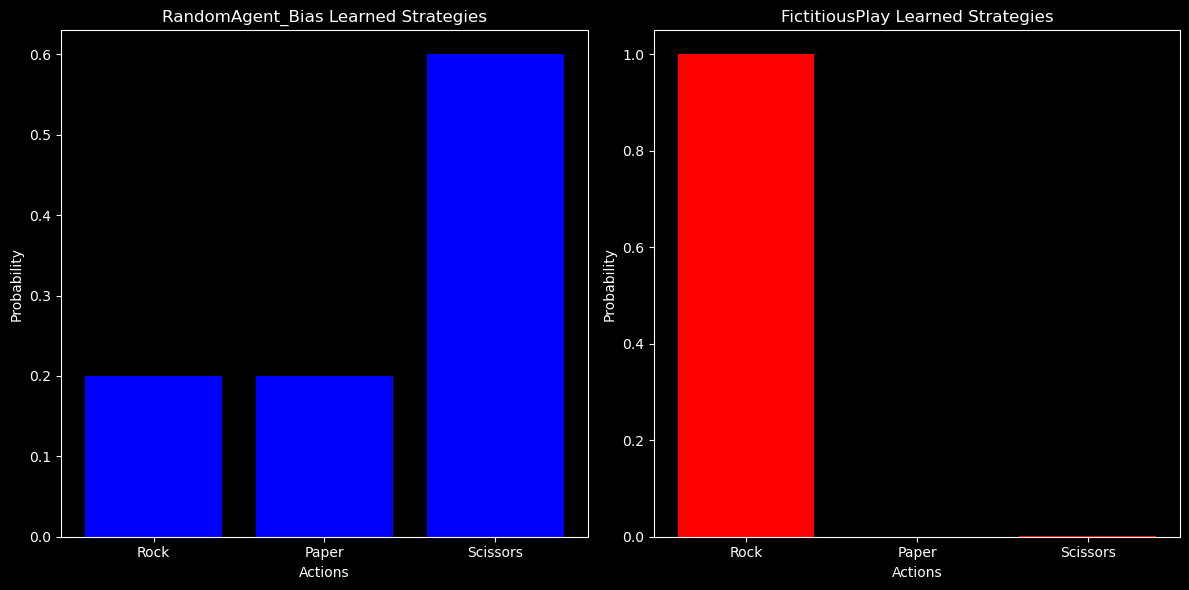

Running experiment with RandomAgent_Bias vs RandomAgent_Bias


100%|██████████| 10000/10000 [00:00<00:00, 48255.87it/s]


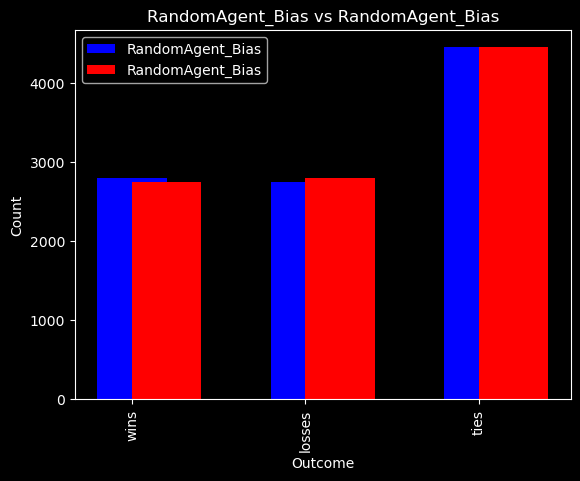

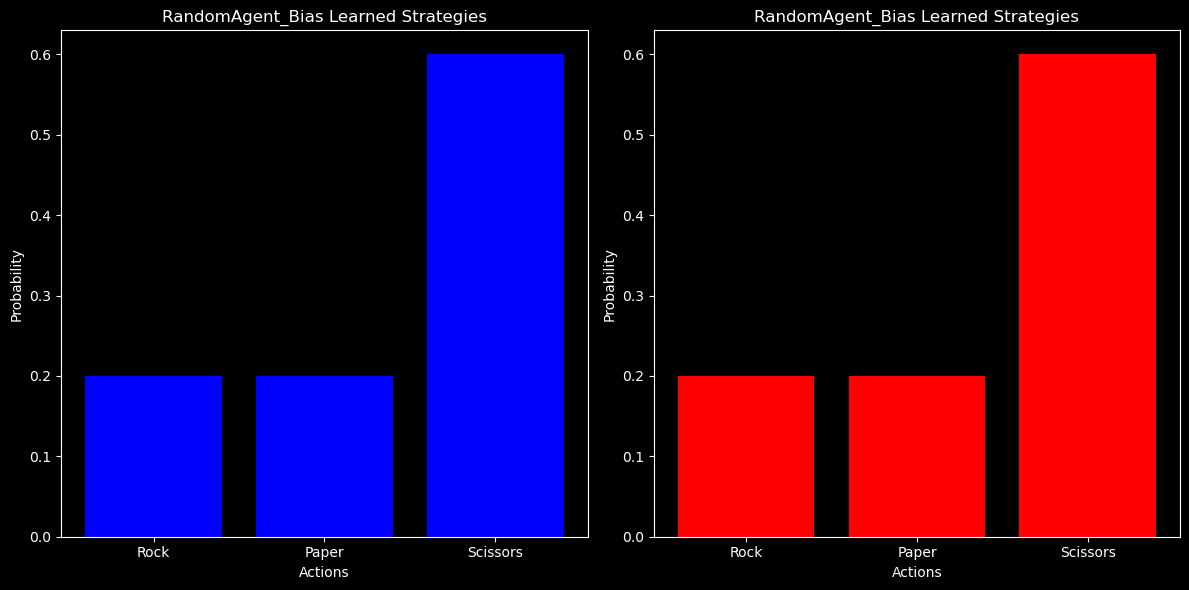

In [8]:
results = {}

for agent1_name, agent2_name in product(all_agents.keys(), repeat=2):
    print(f"Running experiment with {agent1_name} vs {agent2_name}")

    # Init agents
    my_agents = {}
    my_agents[g.agents[0]] = all_agents[agent1_name](g, g.agents[0])
    my_agents[g.agents[1]] = all_agents[agent2_name](g, g.agents[1])

    # Play game
    learned_strategies, agent_wins = play_rps_game(my_agents, 10000)
    results[(agent1_name, agent2_name)] = {'learned_strategies': learned_strategies, 'agent_results': agent_wins}


    plot_agent_results(results, agent1_name, agent2_name, g.agents[0], g.agents[1])
    plot_learned_strategies(learned_strategies, agent1_name, agent2_name, g.agents[0], g.agents[1])


In [10]:
g.reset()
my_agents = {}
my_agents[g.agents[0]] = RegretMatching(g, g.agents[0])
my_agents[g.agents[1]] = HumanAgent(g, g.agents[1])
play_rps_game(my_agents, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 10%|█         | 1/10 [00:02<00:18,  2.05s/it]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 20%|██        | 2/10 [00:02<00:09,  1.17s/it]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 30%|███       | 3/10 [00:03<00:05,  1.21it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 40%|████      | 4/10 [00:03<00:04,  1.44it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 50%|█████     | 5/10 [00:03<00:03,  1.64it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 60%|██████    | 6/10 [00:04<00:02,  1.61it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 70%|███████   | 7/10 [00:05<00:01,  1.69it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 80%|████████  | 8/10 [00:05<00:01,  1.81it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


 90%|█████████ | 9/10 [00:06<00:00,  1.80it/s]

Select Action: ['R', 'P', 'S'] by pressing [0-2]


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


({'agent_0': array([0.06666667, 0.06666667, 0.86666667]),
  'agent_1': array([0. , 0.8, 0.2])},
 {'agent_0': {'wins': 7, 'losses': 0, 'ties': 3},
  'agent_1': {'wins': 0, 'losses': 7, 'ties': 3}})